# Import Library and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Data Preprocessing

In [3]:
df.shape

(14999, 10)

# Column list

In [4]:
df.columns.to_list()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Missing Value Handing - Checking Null Value

In [6]:

df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

# Data statistics

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Change the column name

In [8]:
df = df.rename(columns={'sales' : 'department'})

In [9]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Change the columns values

In [10]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [11]:
df['department']=np.where(df['department'] =='support', 'technical', df['department'])

df['department']=np.where(df['department'] =='support', 'technical', df['department'])

In [12]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Categorical to Numerical - Feature Transformation

In [13]:
depart = pd.get_dummies(df['department'], prefix='department', drop_first=True )
sales = pd.get_dummies(df['salary'], prefix='salary', drop_first=True )

In [14]:
df = df.join(depart)
df = df.join(sales)

In [15]:
cols = ['department', 'salary']
df.drop(cols, axis=1, inplace=True)

In [16]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,True,False


In [17]:
df.shape

(14999, 18)

# Data Visualization

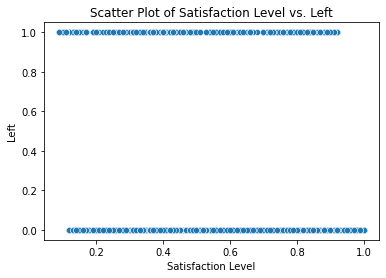

In [18]:
# Create a scatter plot
sns.scatterplot(x=df['satisfaction_level'], y=df['left'])

# Add titles and labels
plt.title('Scatter Plot of Satisfaction Level vs. Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Left')
plt.show()

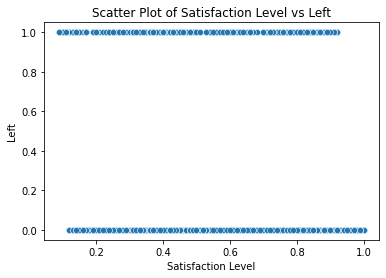

In [19]:
sns.scatterplot(x=df['satisfaction_level'], y=df['left'])
plt.xlabel('Satisfaction Level')
plt.ylabel('Left')
plt.title('Scatter Plot of Satisfaction Level vs Left')
plt.show()

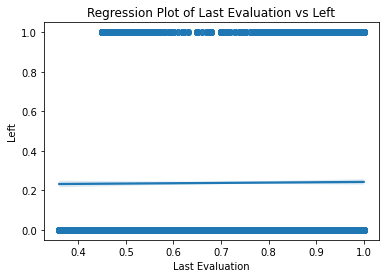

In [20]:
sns.regplot(x='last_evaluation', y='left', data=df)
plt.xlabel('Last Evaluation')
plt.ylabel('Left')
plt.title('Regression Plot of Last Evaluation vs Left')
plt.show()

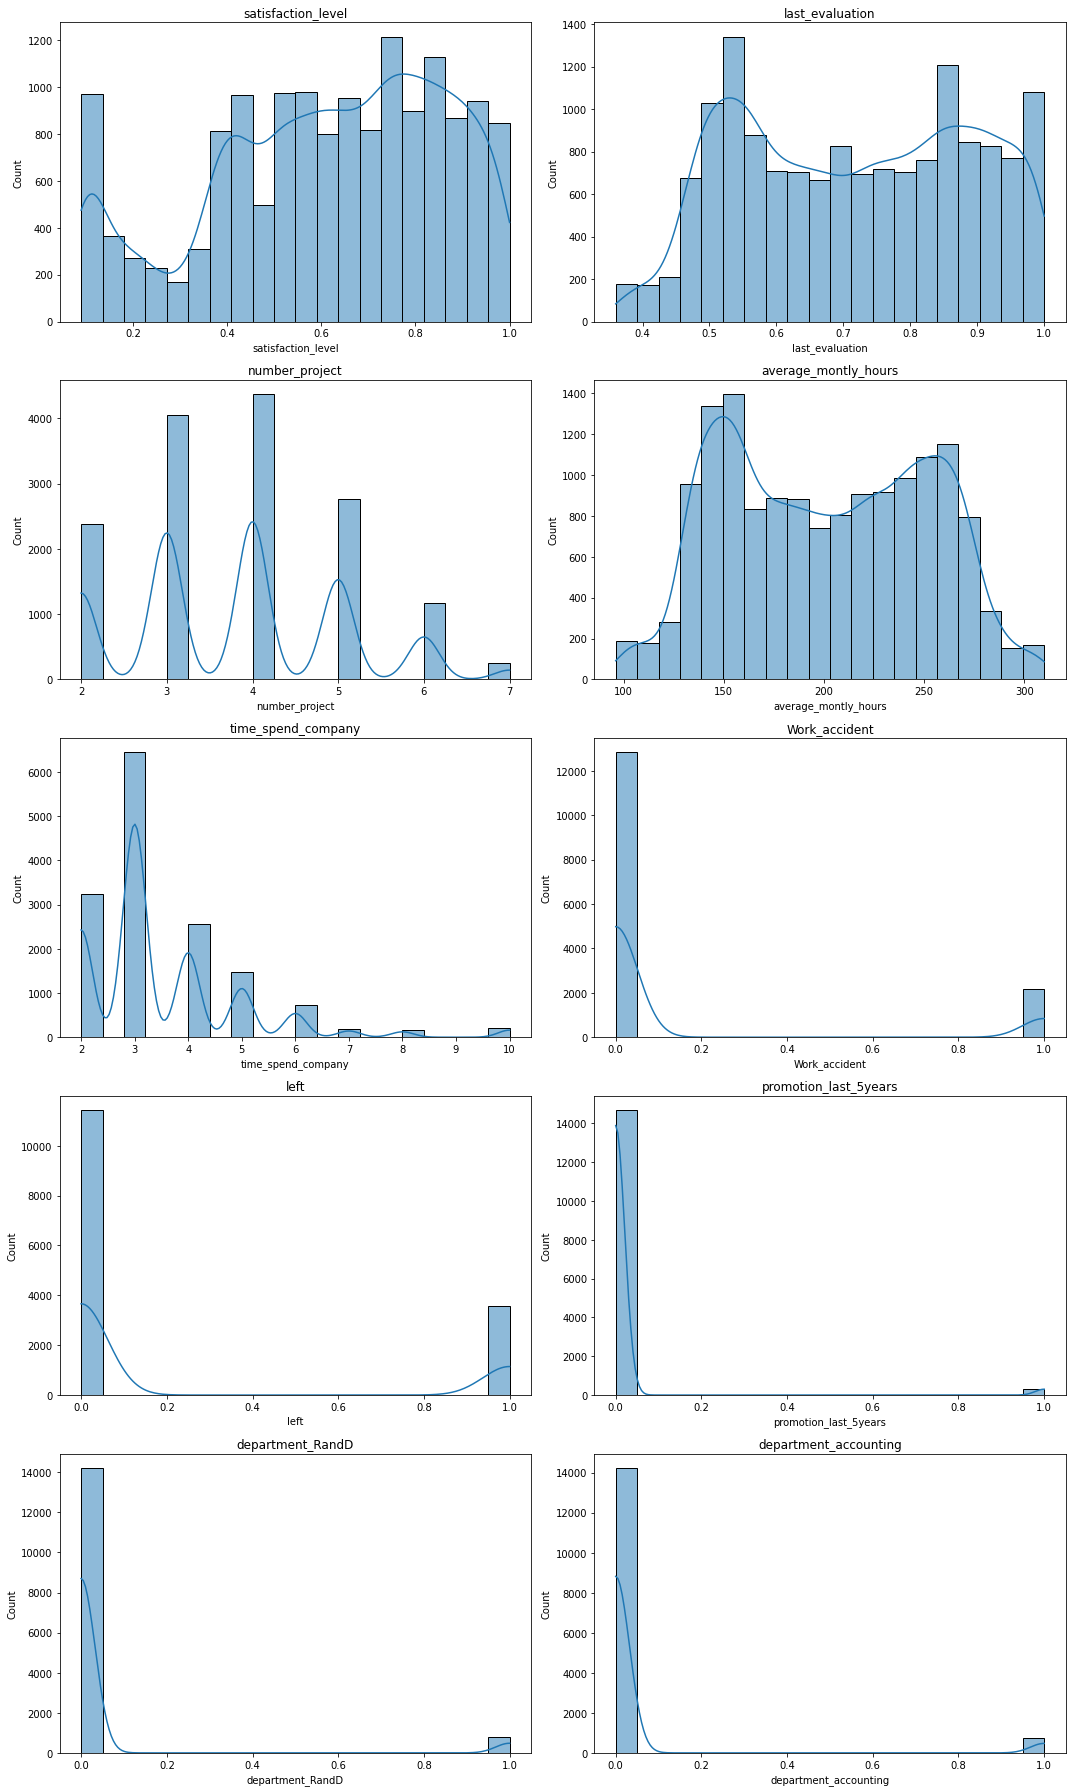

In [21]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 25))

# Number of subplots
plt_num = 1

# Loop through each column and create a subplot
for col in df.columns:
    if plt_num <= 10:  # Adjust based on the number of columns
        plt.subplot(5, 2, plt_num)
        sns.histplot(df[col], kde=True, bins=20)  # Histogram with KDE
        plt.title(col)
    plt_num += 1

plt.tight_layout()
plt.show()

# Outlier handing

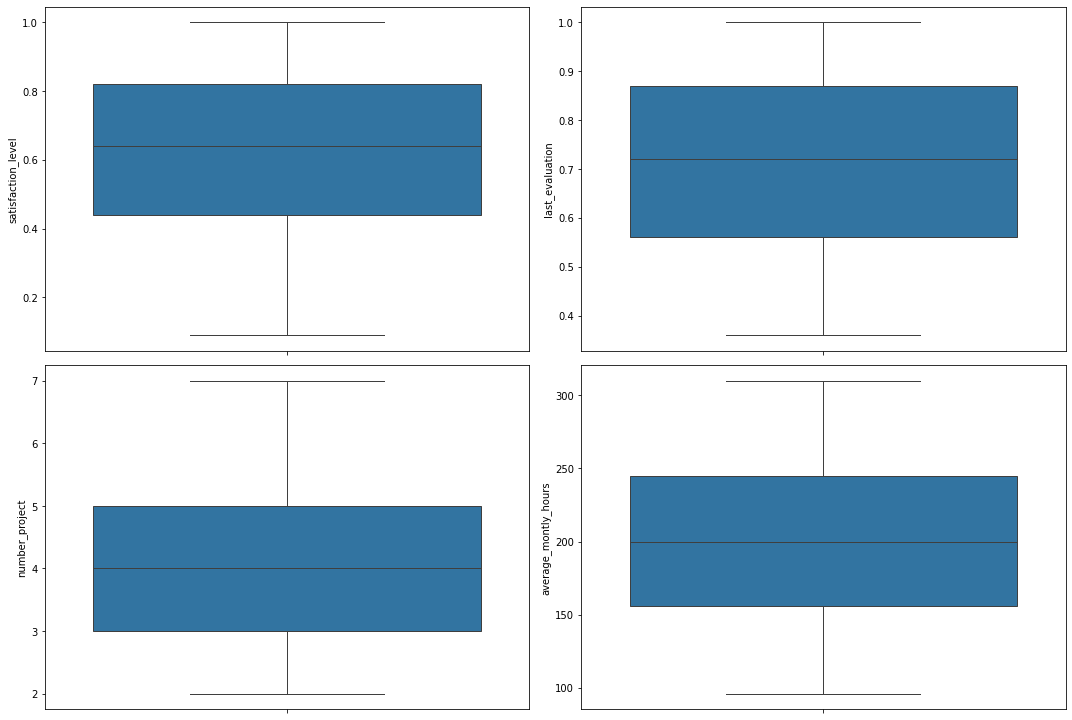

In [22]:
plt.figure(figsize=(15,25))
plt_num =1

for col in df.columns:
    if plt_num < 5:
        plt.subplot(5,2,plt_num)
        sns.boxplot(y=df[col])
    plt_num += 1
plt.tight_layout()

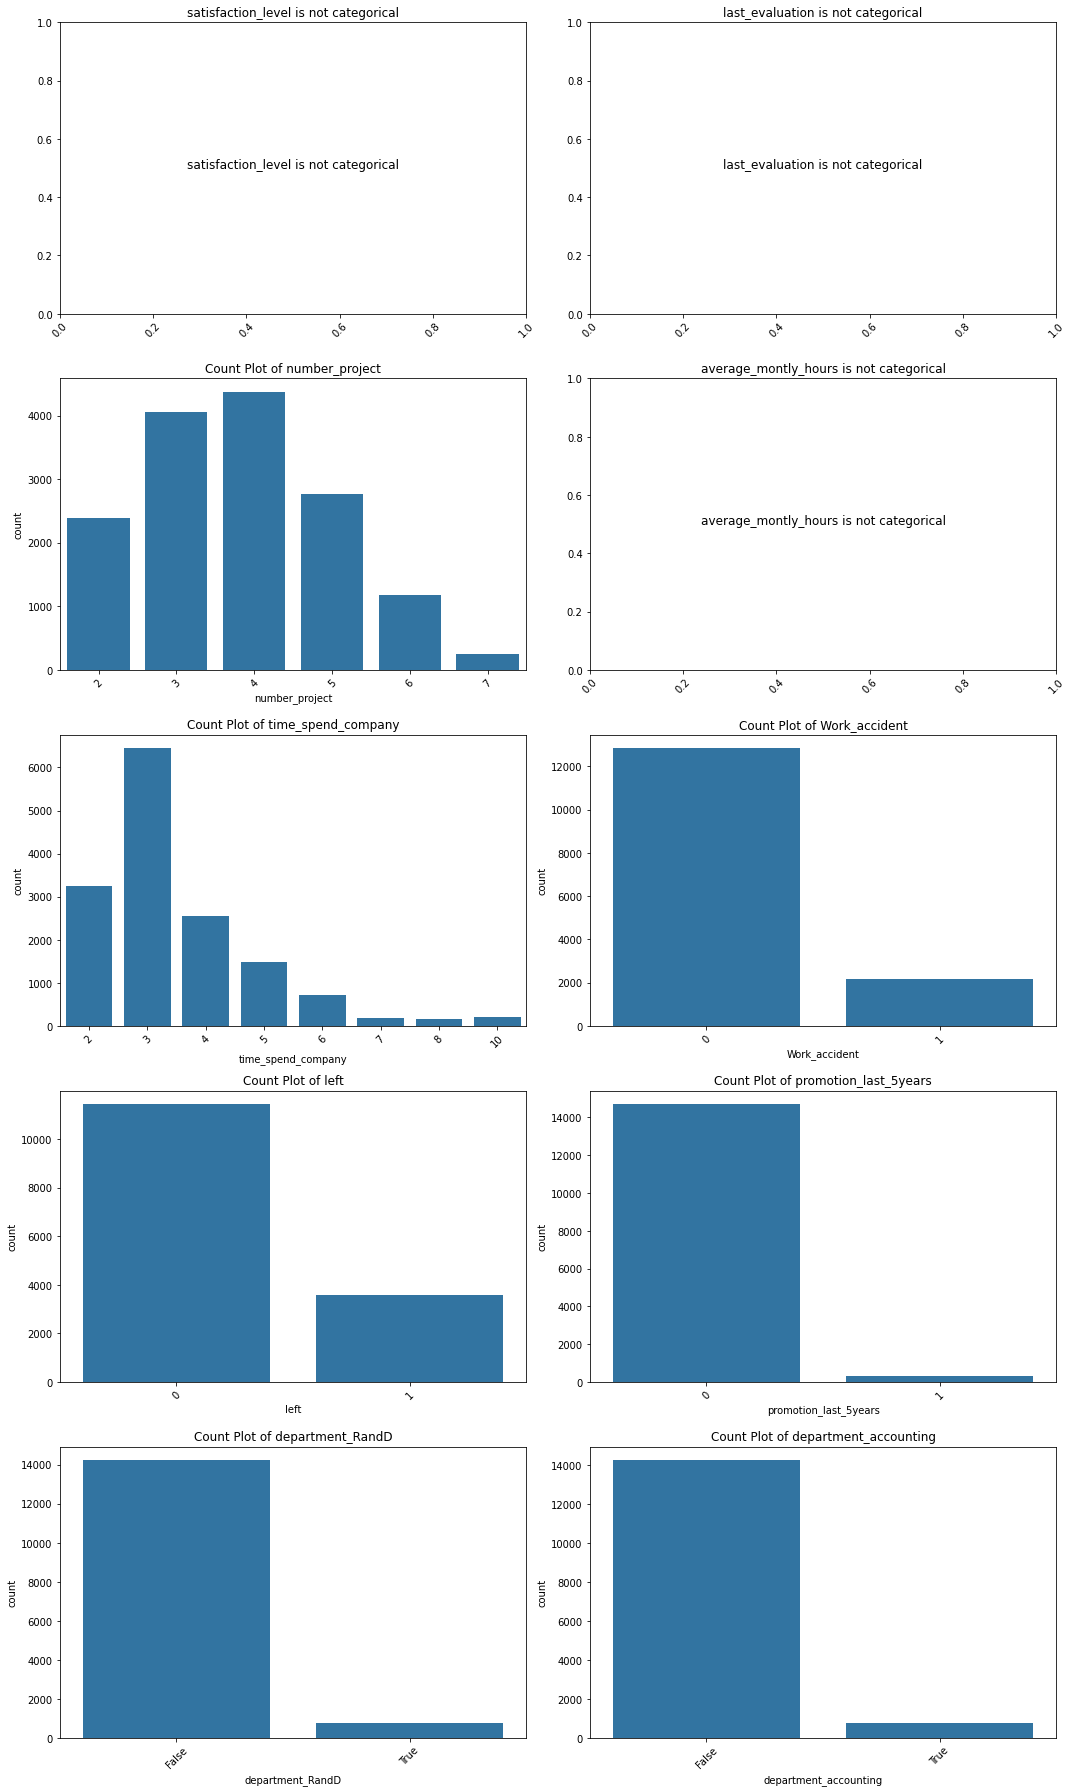

In [23]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 25))

# Number of subplots
plt_num = 1

# Loop through each column and create a subplot
for col in df.columns:
    if plt_num <= 10:  # Adjust based on the number of columns
        plt.subplot(5, 2, plt_num)
        # Check if the column is categorical or needs conversion
        if df[col].dtype == 'object' or df[col].nunique() < 20:  # Typically, categorical data or low cardinality
            sns.countplot(x=df[col])  # Use 'x' for the categorical data
            plt.title(f'Count Plot of {col}')
        else:
            plt.text(0.5, 0.5, f'{col} is not categorical', fontsize=12, ha='center')
            plt.title(f'{col} is not categorical')
        plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt_num += 1

plt.tight_layout()
plt.show()

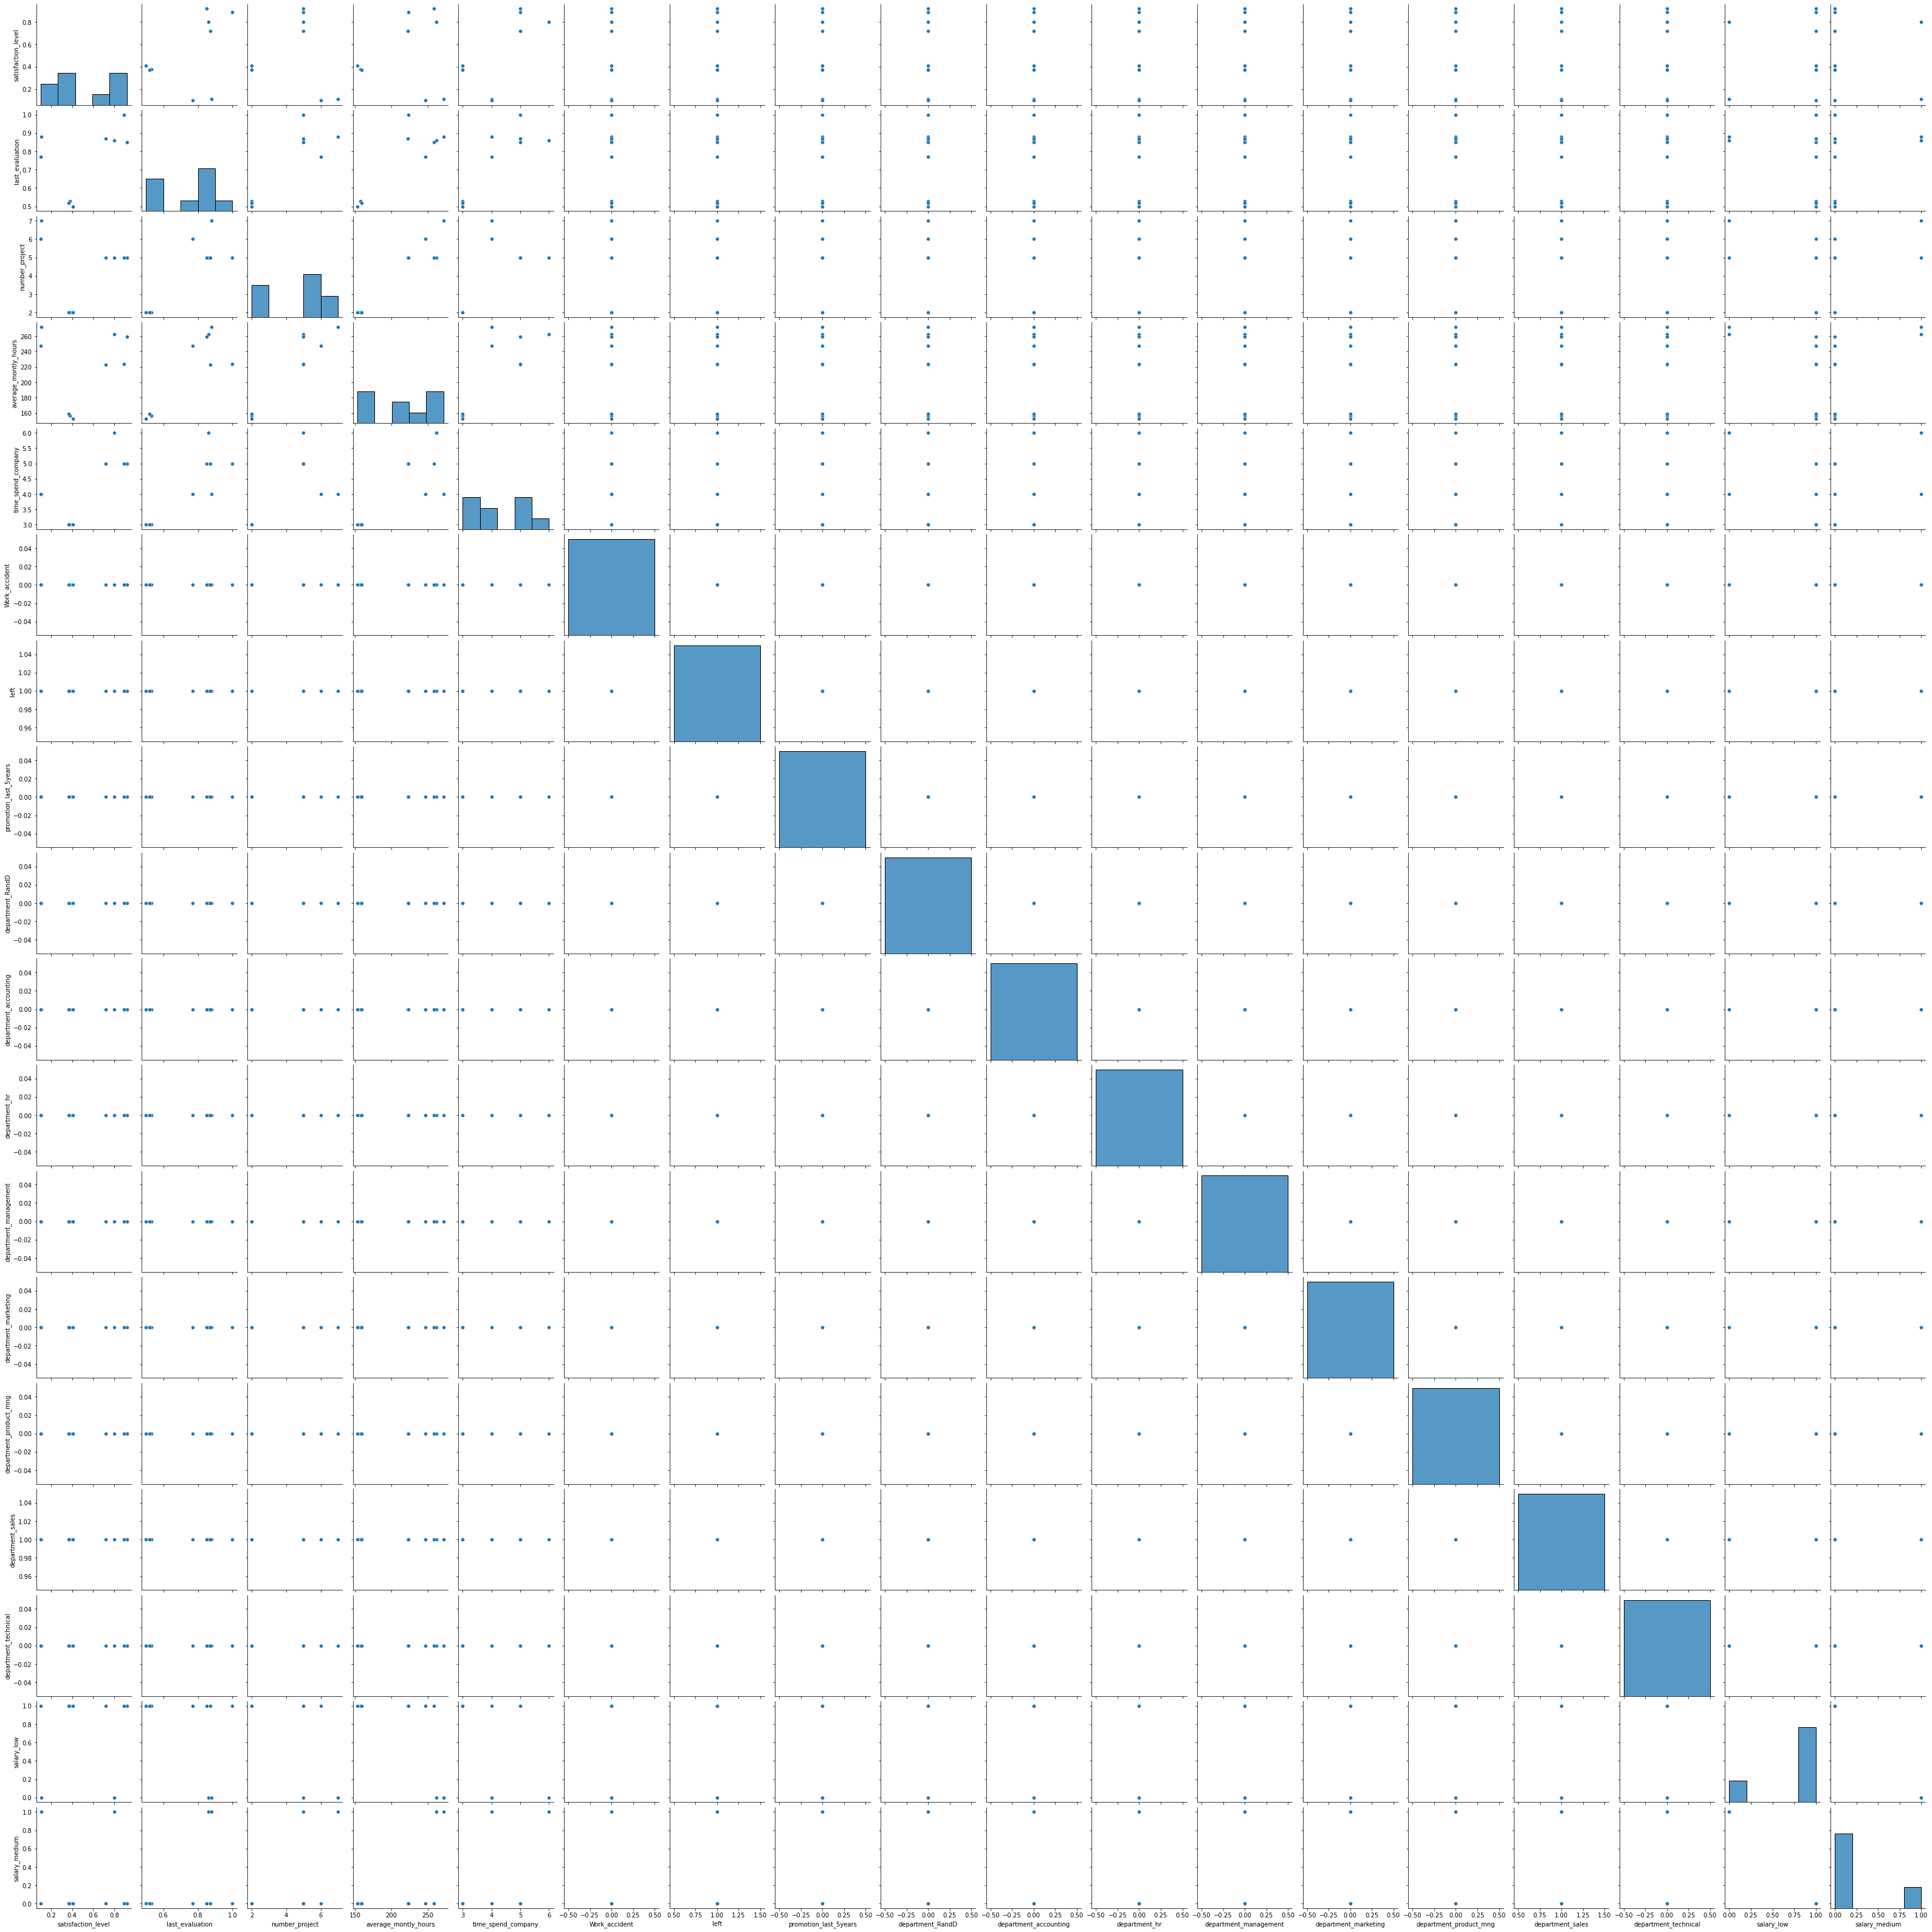

In [24]:
sns.pairplot(df.iloc[:9])  # Use iloc to select the first 9 rows

# Show the plot
plt.show()

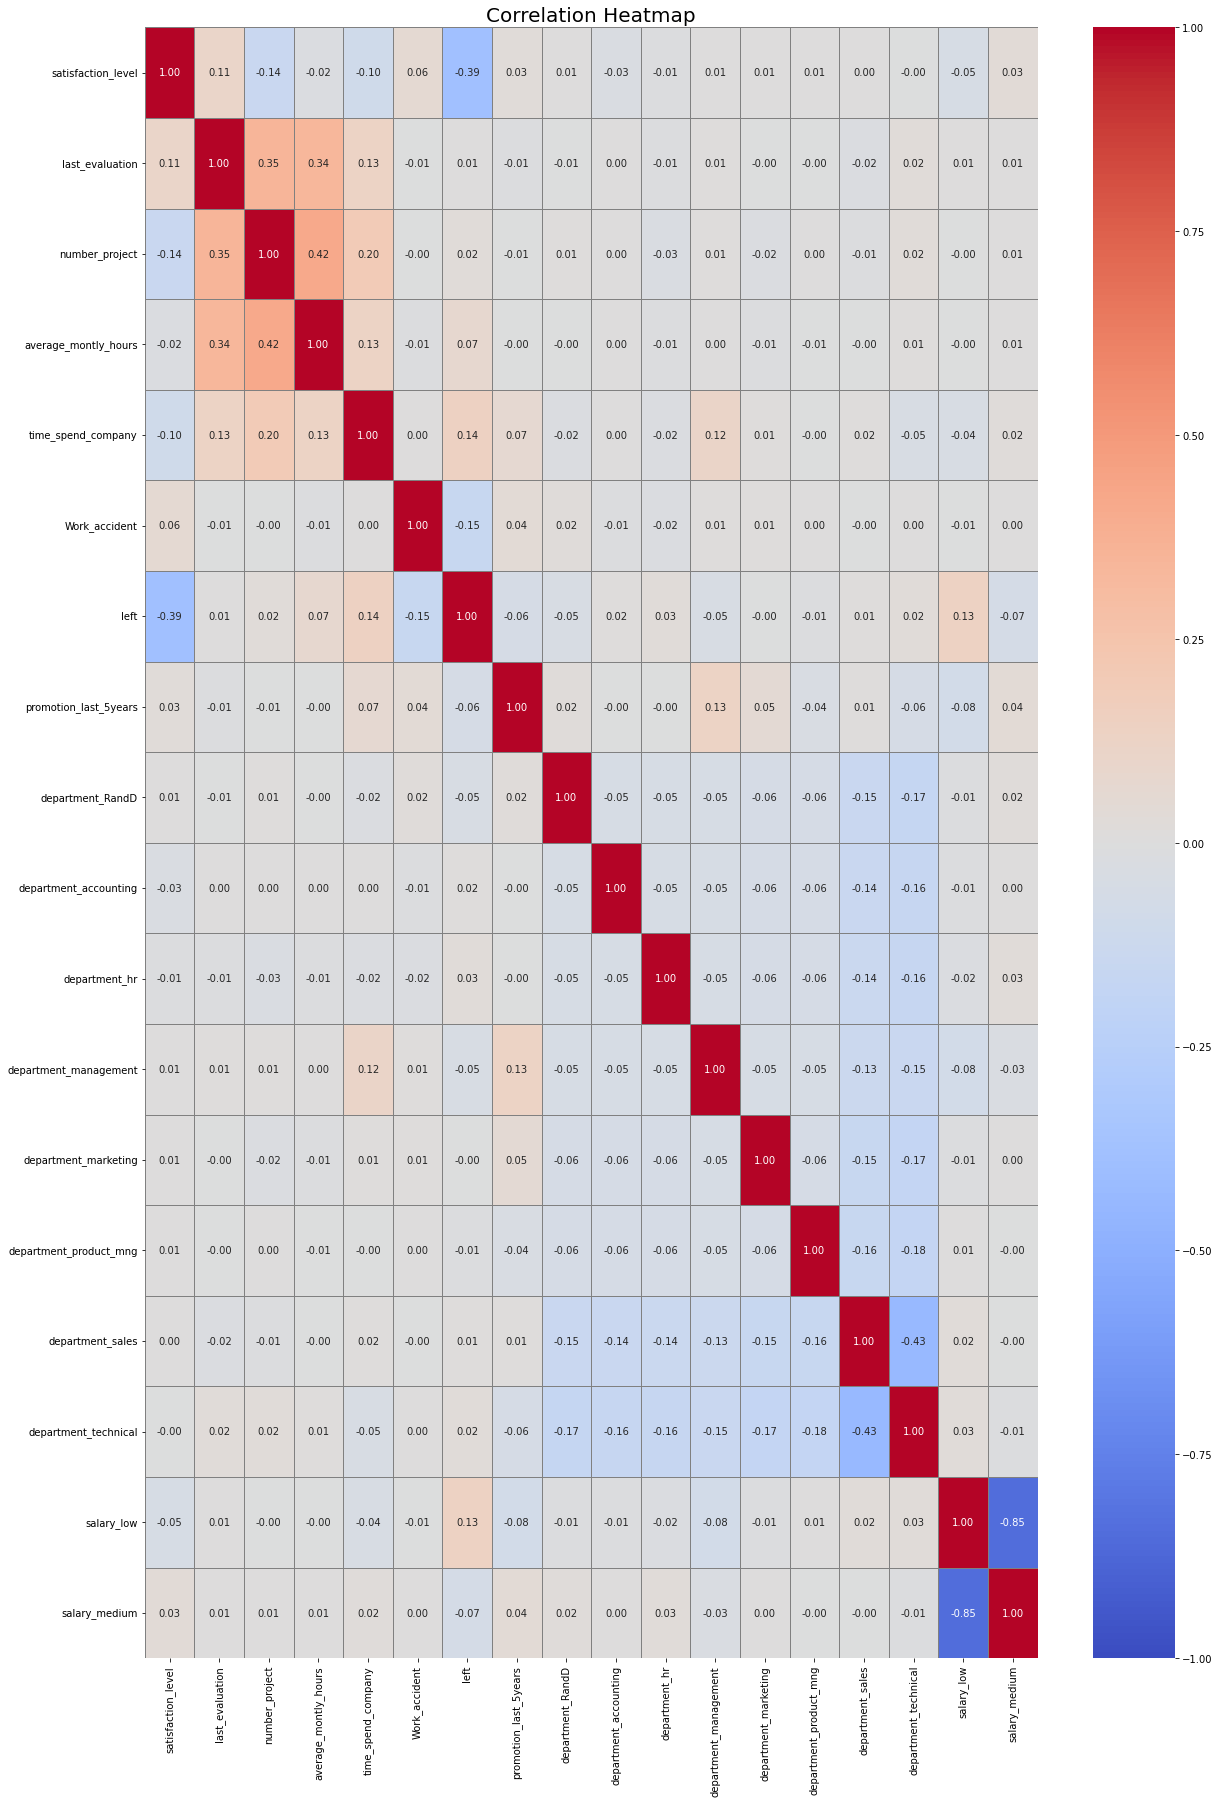

In [25]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 30))

# Create a heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='gray')

# Add titles and labels if needed
plt.title('Correlation Heatmap', size=20)
plt.show()

In [26]:
X = df.drop('left', axis=1)
y = df['left']

In [27]:
len(X.columns)

17

# Feature Selecton

In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

In [31]:
df = pd.read_csv('dataset.csv')
# Check for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode categorical columns using get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


# Define X (features) and y (target)
X = df_encoded.drop('left', axis=1)  # Assuming 'left' is the target variable
y = df_encoded['left']

# Instantiate the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increasing max_iter to ensure convergence

# Instantiate the RFE model
rfe = RFE(model, n_features_to_select=10)  # Selecting top 10 features

# Fit the RFE model
rfe = rfe.fit(X, y)

# Print the support and ranking of the features
print("Selected Features:", rfe.support_)
print("Feature Ranking:", rfe.ranking_)

Selected Features: [ True  True False False  True  True  True  True False  True  True False
 False False False False  True  True]
Feature Ranking: [1 1 2 9 1 1 1 1 5 1 1 6 8 7 4 3 1 1]


In [32]:
# Print the column names of X
print(X.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_RandD', 'sales_accounting', 'sales_hr',
       'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_low',
       'salary_medium'],
      dtype='object')


In [35]:
print(df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')


In [37]:
# One-hot encode categorical variables 'sales' and 'salary'
df_encoded = pd.get_dummies(df, columns=['sales', 'salary'], drop_first=True)


In [38]:
# Verify the new column names after encoding
print(df_encoded.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales_RandD', 'sales_accounting', 'sales_hr',
       'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_low',
       'salary_medium'],
      dtype='object')


In [39]:
df = pd.read_csv('dataset.csv')
new_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
            'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales_RandD', 
            'sales_accounting', 'sales_hr', 'sales_management', 'sales_marketing', 
            'sales_product_mng', 'sales_sales', 'sales_support', 'sales_technical', 
            'salary_low', 'salary_medium']

# Define X (features) and y (target)
X = df_encoded[new_cols]
y = df_encoded['left']
# Print the column names of X to verify
print("Column names of X:")
print(X.columns)


Column names of X:
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_RandD', 'sales_accounting', 'sales_hr',
       'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_low',
       'salary_medium'],
      dtype='object')


# Train and Test Split

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=92)

# Model Building

# Logistics Regression

In [43]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()

In [44]:
model_logistic.fit(X_train, y_train)

C:\Users\rnist\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
model_logistic.score(X_train, y_train)

0.7971235355748166

In [46]:
model_logistic.score(X_test, y_test)

0.7997777777777778

# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()

In [48]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
model_tree.score(X_train, y_train)

1.0

In [50]:
model_tree.score(X_test, y_test)

0.9764444444444444

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

In [52]:
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
model_rf.score(X_train, y_train)

1.0

In [54]:
model_rf.score(X_test, y_test)

0.9935555555555555

# Model Evaluation

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3439
           1       1.00      0.98      0.99      1061

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500



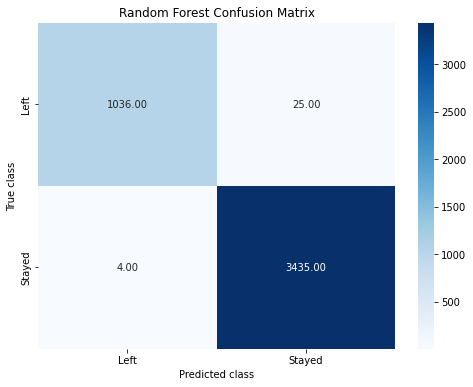

In [58]:
from sklearn.metrics import confusion_matrix

y_pred = model_rf.predict(X_test)

forest_cm = confusion_matrix(y_test, y_pred, labels=[1, 0])


# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(forest_cm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=["Left", "Stayed"], yticklabels=["Left", "Stayed"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest Confusion Matrix')
plt.show()

# AUC ROC Curve

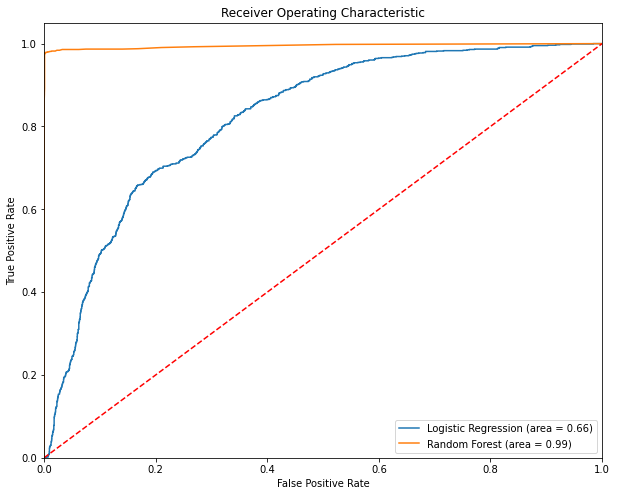

In [59]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Logistic Regression
logit_roc_auc = roc_auc_score(y_test, model_logistic.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_logistic.predict_proba(X_test)[:, 1])

# Random Forest
rf_roc_auc = roc_auc_score(y_test, model_rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1])

# Plot ROC Curves
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'r--')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [60]:
# Random Forest Model has proven to be more useful in the prediction of employee turnovernow ,let’s have a look at the feature importance of our random forest classification model.
model_rf.feature_importances_

array([0.32237925, 0.11507715, 0.18983463, 0.1486523 , 0.18128151,
       0.01053127, 0.00192985, 0.00167391, 0.00159019, 0.00166315,
       0.00172996, 0.00134281, 0.00116123, 0.00350821, 0.00311559,
       0.00368726, 0.00721398, 0.00362778])

In [61]:
#according to our Random Forest classification model, the above aspects show the most important features which will influence whether an employee will leave the company, in ascending order.
import numpy as np

# Assuming `model_rf` is your trained Random Forest model

# Define feature labels
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'number_project', 
                           'average_montly_hours', 'time_spend_company', 'Work_accident', 
                           'promotion_last_5years', 'sales_RandD', 'sales_accounting', 
                           'sales_hr', 'sales_management', 'sales_marketing', 
                           'sales_product_mng', 'sales_sales', 'sales_support', 
                           'sales_technical', 'salary_low', 'salary_medium'])

# Get feature importances
importance = model_rf.feature_importances_

# Sort feature indexes by importance
feature_indexes_by_importance = importance.argsort()

# Print feature importances
for index in feature_indexes_by_importance:
    print('{} -> {:.2f}%'.format(feature_labels[index], (importance[index] * 100.0)))


sales_product_mng -> 0.12%
sales_marketing -> 0.13%
sales_accounting -> 0.16%
sales_hr -> 0.17%
sales_RandD -> 0.17%
sales_management -> 0.17%
promotion_last_5years -> 0.19%
sales_support -> 0.31%
sales_sales -> 0.35%
salary_medium -> 0.36%
sales_technical -> 0.37%
salary_low -> 0.72%
Work_accident -> 1.05%
last_evaluation -> 11.51%
average_montly_hours -> 14.87%
time_spend_company -> 18.13%
number_project -> 18.98%
satisfaction_level -> 32.24%
